In [ ]:
'''
checklist:
- look at how many iterations it takes to converge (along with wall-clock time) for both VI and PI
- define convergence criteria explicitly
- look at how the # of states affects convergence
- compare Q-learning to VI and PI
- look at different exploration strategies (? maybe they mean reward-shaping and such); talk about exploration-exploitation with visuals
- topics to look at: convergence issues, differing optimal policies, sensitivity
to tuning strategies

convergence can include:
  - mean V or max V against iteration
  - reward against iteration
  - delta convergence
generate plots that look at state space size
generates visualizations of policies

#talk about how Q-learning wo shaping succeeds on taxi and fails on forest
'''

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bettermdptools: filename=bettermdptools-0.4.0-py3-none-any.whl size=11856 sha256=461c74dbe213530b9696cd467a20dd2059650cb97ec0b68a15c07ad55644f93a
  Stored in directory: /root/.cache/pip/wheels/b0/78/c1/a03ad20528780b5d6c33d3d8063f740b337388bf97b926f366
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827619 sha256=6202bd95fd77150d8b214ee9213c3b767b9bf67b1135f9099f44014b54b457da
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built bettermdptools gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver do

In [ ]:
!pip install bettermdptools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bettermdptools: filename=bettermdptools-0.4.0-py3-none-any.whl size=11856 sha256=54a640522d43b4f607ff598f11786bb02440f9d517f71b9d37fe16c88764cdff
  Stored in directory: /root/.cache/pip/wheels/b0/78/c1/a03ad20528780b5d6c33d3d8063f740b337388bf97b926f366
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827617 sha256=ea382780bc98ef047564c4be5046257e808ab6fe2702c6f6c18a39b91e912d3a
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built bettermdptools gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver do

In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.3 MB/s eta 0:00:00


In [ ]:
import gym
import pygame
from algorithms.rl import RL
from examples.test_env import TestEnv

In [ ]:
!pip install mdptoolbox-hiive

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00
  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-py3-none-any.whl size=35120 sha256=8aa65b134172ba10931f02aedfbf52d6ec2a0c69992fd37b770986a8f1bfdf05
  Stored in directory: /root/.cache/pip/wheels/3c/21/00/79fb3890bf11432b069070b7623416cd8b9f8501580692a52f
Successfully built mdptoolbox-hiive


In [221]:
import hiive.mdptoolbox.util as _util
import scipy.sparse as sp
import time as time

def _computeDimensions(transition):
    A = len(transition)
    try:
        if transition.ndim == 3:
            S = transition.shape[1]
        else:
            S = transition[0].shape[0]
    except AttributeError:
        S = transition[0].shape[0]
    return S, A

def _printVerbosity(iteration, variation):
    if isinstance(variation, float):
        print("{:>10}{:>12f}".format(iteration, variation))
    elif isinstance(variation, int):
        print("{:>10}{:>12d}".format(iteration, variation))
    else:
        print("{:>10}{:>12}".format(iteration, variation))

class MDP:
    """A Markov Decision Problem.

    Let ``S`` = the number of states, and ``A`` = the number of acions.

    Parameters
    ----------
    transitions : array
        Transition probability matrices. These can be defined in a variety of
        ways. The simplest is a numpy array that has the shape ``(A, S, S)``,
        though there are other possibilities. It can be a tuple or list or
        numpy object array of length ``A``, where each element contains a numpy
        array or matrix that has the shape ``(S, S)``. This "list of matrices"
        form is useful when the transition matrices are sparse as
        ``scipy.sparse.csr_matrix`` matrices can be used. In summary, each
        action's transition matrix must be indexable like ``transitions[a]``
        where ``a`` ∈ {0, 1...A-1}, and ``transitions[a]`` returns an ``S`` ×
        ``S`` array-like object.
    reward : array
        Reward matrices or vectors. Like the transition matrices, these can
        also be defined in a variety of ways. Again the simplest is a numpy
        array that has the shape ``(S, A)``, ``(S,)`` or ``(A, S, S)``. A list
        of lists can be used, where each inner list has length ``S`` and the
        outer list has length ``A``. A list of numpy arrays is possible where
        each inner array can be of the shape ``(S,)``, ``(S, 1)``, ``(1, S)``
        or ``(S, S)``. Also ``scipy.sparse.csr_matrix`` can be used instead of
        numpy arrays. In addition, the outer list can be replaced by any object
        that can be indexed like ``reward[a]`` such as a tuple or numpy object
        array of length ``A``.
    gamma : float
        Discount factor. The per time-step discount factor on future rewards.
        Valid values are greater than 0 upto and including 1. If the discount
        factor is 1, then convergence is cannot be assumed and a warning will
        be displayed. Subclasses of ``MDP`` may pass ``None`` in the case where
        the algorithm does not use a discount factor.
    epsilon : float
        Stopping criterion. The maximum change in the value function at each
        iteration is compared against ``epsilon``. Once the change falls below
        this value, then the value function is considered to have converged to
        the optimal value function. Subclasses of ``MDP`` may pass ``None`` in
        the case where the algorithm does not use an epsilon-optimal stopping
        criterion.
    max_iter : int
        Maximum number of iterations. The algorithm will be terminated once
        this many iterations have elapsed. This must be greater than 0 if
        specified. Subclasses of ``MDP`` may pass ``None`` in the case where
        the algorithm does not use a maximum number of iterations.
    skip_check : bool
        By default we run a check on the ``transitions`` and ``rewards``
        arguments to make sure they describe a valid MDP. You can set this
        argument to True in order to skip this check.

    Attributes
    ----------
    P : array
        Transition probability matrices.
    R : array
        Reward vectors.
    V : tuple
        The optimal value function. Each element is a float corresponding to
        the expected value of being in that state assuming the optimal policy
        is followed.
    gamma : float
        The discount rate on future rewards.
    max_iter : int
        The maximum number of iterations.
    policy : tuple
        The optimal policy.
    time : float
        The time used to converge to the optimal policy.
    verbose : boolean
        Whether verbose output should be displayed or not.

    Methods
    -------
    run
        Implemented in child classes as the main algorithm loop. Raises an
        exception if it has not been overridden.
    setSilent
        Turn the verbosity off
    setVerbose
        Turn the verbosity on

    """

    def __init__(self, transitions, reward, gamma, epsilon, max_iter,
                 skip_check=False):
        # Initialise a MDP based on the input parameters.

        # if the discount is None then the algorithm is assumed to not use it
        # in its computations
        if gamma is not None:
            self.gamma = float(gamma)
            assert 0.0 < self.gamma <= 1.0, (
                "Discount rate must be in ]0; 1]"
            )
            if self.gamma == 1:
                print("WARNING: check conditions of convergence. With no "
                      "discount, convergence can not be assumed.")

        # if the max_iter is None then the algorithm is assumed to not use it
        # in its computations
        if max_iter is not None:
            self.max_iter = int(max_iter)
            assert self.max_iter > 0, (
                "The maximum number of iterations must be greater than 0."
            )

        # check that epsilon is something sane
        if epsilon is not None:
            self.epsilon = float(epsilon)
            assert self.epsilon > 0, "Epsilon must be greater than 0."

        if not skip_check:
            # We run a check on P and R to make sure they are describing an
            # MDP. If an exception isn't raised then they are assumed to be
            # correct.
            _util.check(transitions, reward)

        self.S, self.A = _computeDimensions(transitions)
        self.P = self._computeTransition(transitions)
        self.R = self._computeReward(reward, transitions)

        # the verbosity is by default turned off
        self.verbose = False
        # Initially the time taken to perform the computations is set to None
        self.time = None
        # set the initial iteration count to zero
        self.iter = 0
        # V should be stored as a vector ie shape of (S,) or (1, S)
        self.V = None
        # policy can also be stored as a vector
        self.policy = None

    def __repr__(self):
        P_repr = "P: \n"
        R_repr = "R: \n"
        for aa in range(self.A):
            P_repr += repr(self.P[aa]) + "\n"
            R_repr += repr(self.R[aa]) + "\n"
        return (P_repr + "\n" + R_repr)

    def _bellmanOperator(self, V=None):
        # Apply the Bellman operator on the value function.
        #
        # Updates the value function and the Vprev-improving policy.
        #
        # Returns: (policy, value), tuple of new policy and its value
        #
        # If V hasn't been sent into the method, then we assume to be working
        # on the objects V attribute
        if V is None:
            # this V should be a reference to the data rather than a copy
            V = self.V
        else:
            # make sure the user supplied V is of the right shape
            try:
                assert V.shape in ((self.S,), (1, self.S)), "V is not the " \
                                                            "right shape (Bellman operator)."
            except AttributeError:
                raise TypeError("V must be a numpy array or matrix.")
        # Looping through each action the the Q-value matrix is calculated.
        # P and V can be any object that supports indexing, so it is important
        # that you know they define a valid MDP before calling the
        # _bellmanOperator method. Otherwise the results will be meaningless.
        Q = np.empty((self.A, self.S))
        for aa in range(self.A):
            Q[aa] = self.R[aa] + self.gamma * self.P[aa].dot(V)
        # Get the policy and value, for now it is being returned but...
        # Which way is better?
        # 1. Return, (policy, value)
        return (Q.argmax(axis=0), Q.max(axis=0))
        # 2. update self.policy and self.V directly
        # self.V = Q.max(axis=1)
        # self.policy = Q.argmax(axis=1)

    def _computeTransition(self, transition):
        return tuple(transition[a] for a in range(self.A))

    def _computeReward(self, reward, transition):
        # Compute the reward for the system in one state chosing an action.
        # Arguments
        # Let S = number of states, A = number of actions
        # P could be an array with 3 dimensions or  a cell array (1xA),
        # each cell containing a matrix (SxS) possibly sparse
        # R could be an array with 3 dimensions (SxSxA) or  a cell array
        # (1xA), each cell containing a sparse matrix (SxS) or a 2D
        # array(SxA) possibly sparse
        try:
            if reward.ndim == 1:
                return self._computeVectorReward(reward)
            elif reward.ndim == 2:
                return self._computeArrayReward(reward)
            else:
                r = tuple(map(self._computeMatrixReward, reward, transition))
                return r
        except (AttributeError, ValueError):
            if len(reward) == self.A:
                r = tuple(map(self._computeMatrixReward, reward, transition))
                return r
            else:
                return self._computeVectorReward(reward)

    def _computeVectorReward(self, reward):
        if sp.issparse(reward):
            raise NotImplementedError
        else:
            r = np.array(reward).reshape(self.S)
            return tuple(r for a in range(self.A))

    def _computeArrayReward(self, reward):
        if sp.issparse(reward):
            raise NotImplementedError
        else:
            def func(x):
                return np.array(x).reshape(self.S)

            return tuple(func(reward[:, a]) for a in range(self.A))

    def _computeMatrixReward(self, reward, transition):
        if sp.issparse(reward):
            # An approach like this might be more memory efficeint
            # reward.data = reward.data * transition[reward.nonzero()]
            # return reward.sum(1).A.reshape(self.S)
            # but doesn't work as it is.
            return reward.multiply(transition).sum(1).A.reshape(self.S)
        elif sp.issparse(transition):
            return transition.multiply(reward).sum(1).A.reshape(self.S)
        else:
            return np.multiply(transition, reward).sum(1).reshape(self.S)

    def _startRun(self):
        if self.verbose:
            _printVerbosity('Iteration', 'Variation')

        self.time = time.time()

    def _endRun(self):
        # store value and policy as tuples
        self.V = tuple(self.V.tolist())

        try:
            self.policy = tuple(self.policy.tolist())
        except AttributeError:
            self.policy = tuple(self.policy)

        self.time = time.time() - self.time

    def run(self):
        """Raises error because child classes should implement this function.
        """
        raise NotImplementedError("You should create a run() method.")

    def setSilent(self):
        """Set the MDP algorithm to silent mode."""
        self.verbose = False

    def setVerbose(self):
        """Set the MDP algorithm to verbose mode."""
        self.verbose = True

class QLearning(MDP):
    """A discounted MDP solved using the Q learning algorithm.

    Parameters
    ----------
    transitions : array
        Transition probability matrices. See the documentation for the ``MDP``
        class for details.
    reward : array
        Reward matrices or vectors. See the documentation for the ``MDP`` class
        for details.
    gamma : float
        Discount factor. See the documentation for the ``MDP`` class for
        details.
    n_iter : int, optional
        Number of iterations to execute. This is ignored unless it is an
        integer greater than the default value. Defaut: 10,000.
    skip_check : bool
        By default we run a check on the ``transitions`` and ``rewards``
        arguments to make sure they describe a valid MDP. You can set this
        argument to True in order to skip this check.

    Data Attributes
    ---------------
    Q : array
        learned Q matrix (SxA)
    V : tuple
        learned value function (S).
    policy : tuple
        learned optimal policy (S).
    mean_discrepancy : array
        Vector of V discrepancy mean over 100 iterations. Then the length of
        this vector for the default value of N is 100 (N/100).

    Examples
    ---------
    >>> # These examples are reproducible only if random seed is set to 0 in
    >>> # both the random and numpy.random modules.
    >>> import numpy as np
    >>> import hiive.mdptoolbox, hiive.mdptoolbox.example
    >>> np.random.seed(0)
    >>> P, R = mdptoolbox.example.forest()
    >>> ql = mdptoolbox.mdp.QLearning(P, R, 0.96)
    >>> ql.run()
    >>> ql.Q
    array([[ 11.198909  ,  10.34652034],
           [ 10.74229967,  11.74105792],
           [  2.86980001,  12.25973286]])
    >>> expected = (11.198908998901134, 11.741057920409865, 12.259732864170232)
    >>> all(expected[k] - ql.V[k] < 1e-12 for k in range(len(expected)))
    True
    >>> ql.policy
    (0, 1, 1)

    >>> import hiive.mdptoolbox
    >>> import numpy as np
    >>> P = np.array([[[0.5, 0.5],[0.8, 0.2]],[[0, 1],[0.1, 0.9]]])
    >>> R = np.array([[5, 10], [-1, 2]])
    >>> np.random.seed(0)
    >>> ql = mdptoolbox.mdp.QLearning(P, R, 0.9)
    >>> ql.run()
    >>> ql.Q
    array([[ 33.33010866,  40.82109565],
           [ 34.37431041,  29.67236845]])
    >>> expected = (40.82109564847122, 34.37431040682546)
    >>> all(expected[k] - ql.V[k] < 1e-12 for k in range(len(expected)))
    True
    >>> ql.policy
    (1, 0)

    """

    def __init__(self, transitions, reward, potential, gamma,
                 alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
                 epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
                 n_iter=10000, skip_check=False, iter_callback=None,
                 run_stat_frequency=None):
        # Initialise a Q-learning MDP.

        # The following check won't be done in MDP()'s initialisation, so let's
        # do it here
        self.max_iter = int(n_iter)
        assert self.max_iter >= 10000, "'n_iter' should be greater than 10000."

        if not skip_check:
            # We don't want to send this to MDP because _computePR should not
            #  be run on it, so check that it defines an MDP
            _util.check(transitions, reward)

        # Store P, S, and A
        self.S, self.A = _computeDimensions(transitions)
        self.P = self._computeTransition(transitions)

        self.R = reward

        self.potential = potential

        self.alpha = np.clip(alpha, 0., 1.)
        self.alpha_start = self.alpha
        self.alpha_decay = np.clip(alpha_decay, 0., 1.)
        self.alpha_min = np.clip(alpha_min, 0., 1.)
        self.gamma = np.clip(gamma, 0., 1.)
        self.epsilon = np.clip(epsilon, 0., 1.)
        self.epsilon_start = self.epsilon
        self.epsilon_decay = np.clip(epsilon_decay, 0., 1.)
        self.epsilon_min = np.clip(epsilon_min, 0., 1.)

        # Initialisations
        self.Q = np.zeros((self.S, self.A))

        self.run_stats = []
        self.error_mean = []
        self.v_mean = []
        self.p_cumulative = []
        self.iter_callback = iter_callback
        self.S_freq = np.zeros((self.S, self.A))
        self.run_stat_frequency = max(1, self.max_iter // 10000) if run_stat_frequency is None else run_stat_frequency

    def run(self):

        # Run the Q-learning algorithm.
        error_cumulative = []
        self.run_stats = []
        self.error_mean = []

        v_cumulative = []
        self.v_mean = []

        self.p_cumulative = []

        self.time = time.time()

        # initial state choice
        s = np.random.randint(0, self.S)
        reset_s = False
        run_stats = []
        for n in range(1, self.max_iter + 1):

            take_run_stat = n % self.run_stat_frequency == 0 or n == self.max_iter

            # Reinitialisation of trajectories every 100 transitions
            if (self.iter_callback is None and (n % 100) == 0) or reset_s:
                s = np.random.randint(0, self.S)

            # Action choice : greedy with increasing probability
            # The agent takes random actions for probability ε and greedy action for probability (1-ε).
            pn = np.random.random()
            if pn < self.epsilon:
                a = np.random.randint(0, self.A)
            else:
                # optimal_action = self.Q[s, :].max()
                a = self.Q[s, :].argmax()

            # Simulating next state s_new and reward associated to <s,s_new,a>
            p_s_new = np.random.random()
            p = 0
            s_new = -1
            while (p < p_s_new) and (s_new < (self.S - 1)):
                s_new = s_new + 1
                p = p + self.P[a][s, s_new]

            try:
                r = self.R[a][s, s_new]
            except IndexError:
                try:
                    r = self.R[s, a]
                except IndexError:
                    r = self.R[s]

            # Q[s, a] = Q[s, a] + alpha*(R + gamma*Max[Q(s’, A)] - Q[s, a])
            # Updating the value of Q
            dQ = self.alpha * (r + (self.gamma * self.potential[s_new] - self.potential[s]) + self.gamma * self.Q[s_new, :].max() - self.Q[s, a])
            self.Q[s, a] = self.Q[s, a] + dQ

            # Computing means all over maximal Q variations values
            error = np.absolute(dQ)

            # compute the value function and the policy
            v = self.Q.max(axis=1)
            self.V = v
            p = self.Q.argmax(axis=1)
            self.policy = p

            self.S_freq[s,a] += 1
            run_stats.append(self._build_run_stat(i=n, s=s, a=a, r=r, p=p, v=v, error=error))

            if take_run_stat:
                error_cumulative.append(error)

                if len(error_cumulative) == 100:
                    self.error_mean.append(np.mean(error_cumulative))
                    error_cumulative = []

                v_cumulative.append(v)

                if len(v_cumulative) == 100:
                    self.v_mean.append(np.mean(v_cumulative, axis=1))
                    v_cumulative = []

                if len(self.p_cumulative) == 0 or not np.array_equal(self.policy, self.p_cumulative[-1][1]):
                    self.p_cumulative.append((n, self.policy.copy()))
                """
                Rewards,errors time at each iteration I think
                But that’s for all of them and steps per episode?

                Alpha decay and min ?
                And alpha and epsilon at each iteration?
                """
                self.run_stats.append(run_stats[-1])
                run_stats = []

            if self.iter_callback is not None:
                reset_s = self.iter_callback(s, a, s_new)

            # current state is updated
            s = s_new

            self.alpha *= self.alpha_decay
            if self.alpha < self.alpha_min:
                self.alpha = self.alpha_min

            self.epsilon *= self.epsilon_decay
            if self.epsilon < self.epsilon_min:
                self.epsilon = self.epsilon_min

        self._endRun()
        # add stragglers
        if len(v_cumulative) > 0:
            self.v_mean.append(np.mean(v_cumulative, axis=1))
        if len(error_cumulative) > 0:
            self.error_mean.append(np.mean(error_cumulative))
        if self.run_stats is None or len(self.run_stats) == 0:
            self.run_stats = run_stats
        return self.run_stats

    def _build_run_stat(self, i, a, error, p, r, s, v):
        run_stat = {
            'State': s,
            'Action': a,
            'Reward': r,
            'Error': error,
            'Time': time.time() - self.time,
            'Alpha': self.alpha,
            'Epsilon': self.epsilon,
            'Gamma': self.gamma,
            'V[0]': v[0],
            'Max V': np.max(v),
            'Mean V': np.mean(v),
            'Iteration': i,
            # 'Value': v.copy(),
             'Policy': p.copy()
        }
        return run_stat

## Forest Management

In [264]:
potentials = [100 * (1 - (100 - i) / (100)) / .999 for i in range(101)]
print(potentials)

[0.0, 1.001001001001002, 2.002002002002004, 3.0030030030030055, 4.004004004004008, 5.0050050050050094, 6.006006006006011, 7.007007007007002, 8.008008008008005, 9.009009009009006, 10.010010010010008, 11.011011011011009, 12.012012012012011, 13.013013013013014, 14.014014014014016, 15.015015015015017, 16.01601601601602, 17.01701701701702, 18.018018018018022, 19.019019019019012, 20.020020020020016, 21.021021021021017, 22.022022022022018, 23.023023023023022, 24.024024024024023, 25.025025025025027, 26.026026026026027, 27.027027027027028, 28.028028028028032, 29.029029029029033, 30.030030030030034, 31.031031031031038, 32.03203203203203, 33.03303303303303, 34.034034034034036, 35.03503503503504, 36.03603603603604, 37.03703703703704, 38.03803803803804, 39.03903903903904, 40.04004004004004, 41.04104104104104, 42.04204204204205, 43.04304304304305, 44.044044044044036, 45.045045045045036, 46.046046046046044, 47.047047047047045, 48.048048048048045, 49.049049049049046, 50.050050050050054, 51.05105105105

In [ ]:
import hiive.mdptoolbox.example
import numpy as np
from hiive import mdptoolbox
from hiive.mdptoolbox import mdp
P, R = mdptoolbox.example.forest(S=100, p=0.001, r1=200, r2=1)

epsilons = [.999, .99, .9]
potentials = potentials

stats = []

for epsilon in epsilons:
  ql = QLearning(P, R, potentials, 1.00, alpha_decay = .99, epsilon_decay=epsilon, epsilon_min=0.01, n_iter=10000)
  ql.run() # result is (0, 0, 0)
  stats.append(ql.run_stats)
# significant note: when you're in the last state, you can stay there until a fire breaks out
# topics to explore: effect of size; effect of p vs. decay; effect of r1 and r2;
# why does value iteration take so much longer

In [ ]:
alphas = [.05, .1, .2]

stats = []
potentials = [0.0] * 100

for alpha in alphas:
  ql = QLearning(P, R, potentials, 1.00, alpha=alpha, alpha_decay = .99, epsilon_decay=.99, epsilon_min=0.01, n_iter=10000)
  ql.run() # result is (0, 0, 0)
  stats.append(ql.run_stats)

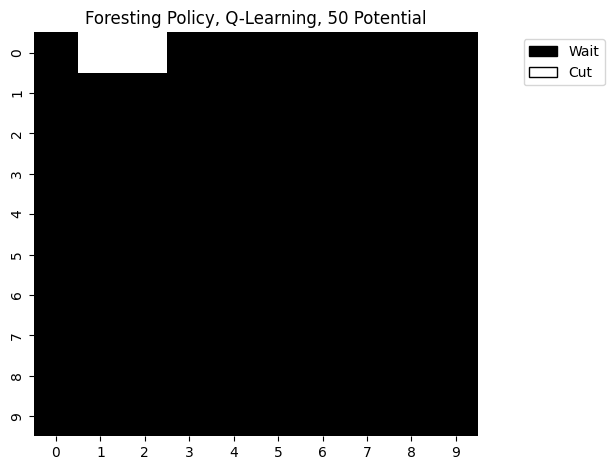

In [276]:
potentials = [50 * (1 - (100 - i) / (100)) / .999 for i in range(101)]

P, R = mdptoolbox.example.forest(S=100, p=0.001, r1=200, r2=1)
ql = QLearning(P, R, potentials, 1.00, alpha=.1, alpha_decay = .99, epsilon_decay=.99, epsilon_min=0.01, n_iter=10000)
ql.run()
pi_array = np.array(ql.run_stats[-1]['Policy']).reshape((10, 10))

legend_elements = [
        Patch(facecolor="black", edgecolor="black", label="Wait"),
        Patch(facecolor="white", edgecolor="black", label="Cut"),
    ]

sns.heatmap(pi_array, cmap=["black", "white"], cbar=False)
plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.title("Foresting Policy, Q-Learning, 50 Potential")
plt.tight_layout()
plt.savefig("ql_forest_50_potential.png")

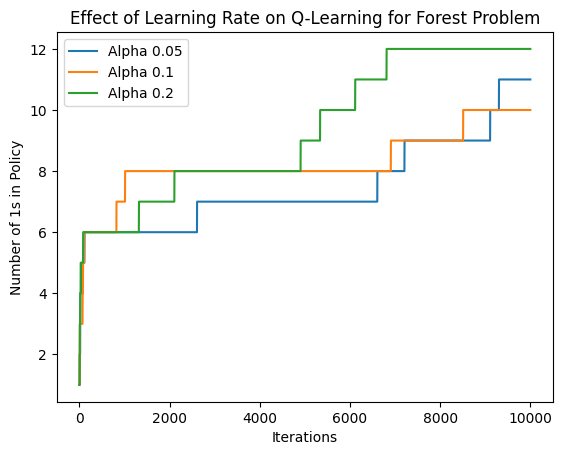

In [ ]:
import matplotlib.pyplot as plt
for i, run_log in enumerate(stats):
  iterations = [i for i in range(0, 10000)]
  p_total = [np.sum(s['Policy']) for s in run_log]
  plt.plot(iterations, p_total, label="Alpha " + str(alphas[i]))
  plt.legend()

plt.xlabel("Iterations")
plt.ylabel("Number of 1s in Policy")
plt.title("Effect of Learning Rate on Q-Learning for Forest Problem")
plt.savefig("QL_Forest_Learning.png")

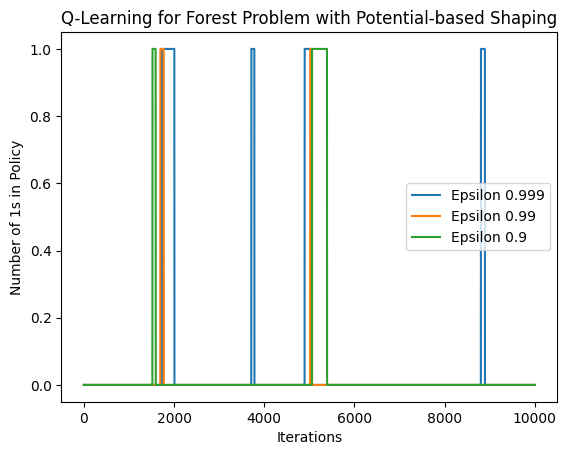

In [ ]:
import matplotlib.pyplot as plt
for i, run_log in enumerate(stats):
  iterations = [i for i in range(0, 10000)]
  p_total = [np.sum(s['Policy']) for s in run_log]
  plt.plot(iterations, p_total, label="Epsilon " + str(epsilons[i]))
  plt.legend()

plt.xlabel("Iterations")
plt.ylabel("Number of 1s in Policy")
plt.title("Q-Learning for Forest Problem with Potential-based Shaping")
plt.savefig("QL_Potential_Learning_Forest.png")

In [ ]:
rewards = [2]
for i in range(1, 100):
  rewards.append(rewards[i - 1] * 1.0)
rewards = rewards[::-1]
print(rewards)

penalties = [-1]

for i in range(1, 100):
  penalties.append(penalties[i - 1] - 2)
print(penalties)

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2]
[-1, -3, -5, -7, -9, -11, -13, -15, -17, -19, -21, -23, -25, -27, -29, -31, -33, -35, -37, -39, -41, -43, -45, -47, -49, -51, -53, -55, -57, -59, -61, -63, -65, -67, -69, -71, -73, -75, -77, -79, -81, -83, -85, -87, -89, -91, -93, -95, -97, -99, -101, -103, -105, -107, -109, -111, -113, -115, -117, -119, -121, -123, -125, -127, -129, -131, -133, -135, -137, -139, -141, -143, -145, -147, -149, -151, -153, -155, -157, -159, -161, -163, -165, -167, -169, -171, -173, -175, -177, -179, -181, -183, -18

In [288]:
import hiive.mdptoolbox.example
from hiive import mdptoolbox
from hiive.mdptoolbox import mdp

import hiive.mdptoolbox.example
from hiive import mdptoolbox
from hiive.mdptoolbox import mdp
import time

pi_iter_stats = []
vi_iter_stats = []

pi_runtimes = []
vi_runtimes = []

for i in range(4, 100):

  P, R = mdptoolbox.example.forest(S=i, p=1 / (i), r1=1, r2=1)
  pi = mdp.PolicyIteration(P, R, 0.99)

  start = time.time()
  pi.run() # result is (0, 0, 0)
  end = time.time()
  pi_runtimes.append(end - start)

  run_stats = pi.run_stats
  pi_iter_stats.append(len(run_stats))

  vi = mdp.ValueIteration(P, R, 0.99)

  start = time.time()
  vi.run() # result is (0, 0, 0)
  end = time.time()
  vi_runtimes.append(end - start)

  run_stats = vi.run_stats
  vi_iter_stats.append(len(run_stats))

# significant note: when you're in the last state, you can stay there until a fire breaks out
# topics to explore: effect of size; effect of p vs. decay; effect of r1 and r2;
# why does value iteration take so much longer

In [284]:
print(run_stats)

[{'State': None, 'Action': None, 'Reward': 49.5, 'Error': 49.5, 'Time': 8.726119995117188e-05, 'Max V': 49.5, 'Mean V': 1.47979797979798, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 98.00999999999999, 'Error': 48.50999999999999, 'Time': 0.00018906593322753906, 'Max V': 98.00999999999999, 'Mean V': 2.45959595959596, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 145.5596, 'Error': 47.5398, 'Time': 0.00028252601623535156, 'Max V': 145.5596, 'Mean V': 4.821490909090908, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 192.15830599999998, 'Error': 46.589003999999996, 'Time': 0.00036835670471191406, 'Max V': 192.15830599999998, 'Mean V': 6.703281878787878, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 237.83454681999999, 'Error': 45.65722392000001, 'Time': 0.00045418739318847656, 'Max V': 237.83454681999999, 'Mean V': 9.8748842179798, 'Iteration': 5}, {'State': None, 'Action': None, 'Reward': 282.5974529926, 'Error': 44.74407944160003, 'Time

In [233]:
P, R = mdptoolbox.example.forest(S=100, p=1 / (10 * 100), r1=2 * 100, r2=1)
pi = mdp.ValueIteration(P, R, 0.99)
pi.run() # result is (0, 0, 0)
np.array(pi.policy).reshape((10, 10))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

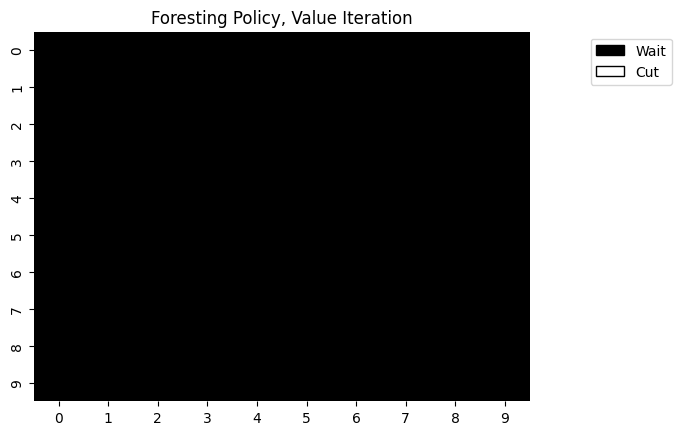

In [234]:
pi_array = np.array(pi.policy).reshape((10, 10))

legend_elements = [
        Patch(facecolor="black", edgecolor="black", label="Wait"),
        Patch(facecolor="white", edgecolor="black", label="Cut"),
    ]

sns.heatmap(pi_array, cmap=["black", "white"], cbar=False)
plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.title("Foresting Policy, Value Iteration")
plt.savefig("vi_forest_policy.png")


In [285]:
vi_iter_stats = []

for i in range(4, 100):

  P, R = mdptoolbox.example.forest(S=i, p=1 / (10 * i), r1=1, r2=1)
  vi = mdp.ValueIteration(P, R, 0.96)
  vi.run() # result is (0, 0, 0)

  run_stats = vi.run_stats
  vi_iter_stats.append(len(run_stats))
# significant note: when you're in the last state, you can stay there until a fire breaks out
# topics to explore: effect of size; effect of p vs. decay; effect of r1 and r2;
# why does value iteration take so much longer

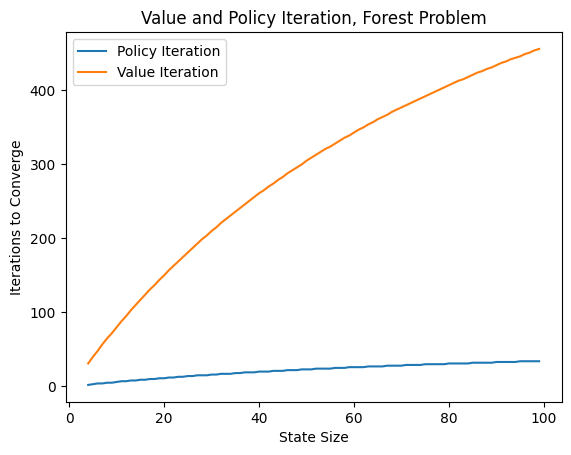

In [289]:
iterations = [i for i in range(4, 100)]
plt.plot(iterations, pi_iter_stats, label="Policy Iteration")
plt.plot(iterations, vi_iter_stats, label="Value Iteration")
plt.xlabel("State Size")
plt.ylabel("Iterations to Converge")
plt.legend()
plt.title("Value and Policy Iteration, Forest Problem")
plt.savefig("pi_vi_forest_2.png")

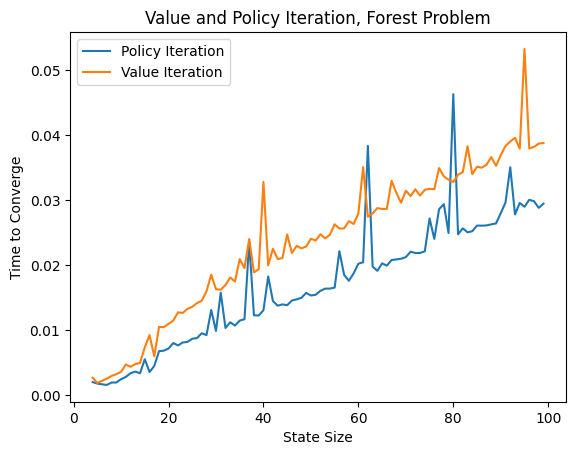

In [290]:
iterations = [i for i in range(4, 100)]
plt.plot(iterations, pi_runtimes, label="Policy Iteration")
plt.plot(iterations, vi_runtimes, label="Value Iteration")
plt.xlabel("State Size")
plt.ylabel("Time to Converge")
plt.legend()
plt.title("Value and Policy Iteration, Forest Problem")
plt.savefig("pi_vi_forest_runtime_2.png")

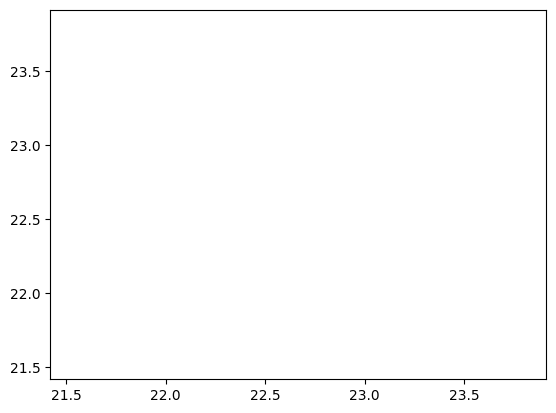

In [ ]:
rewards = [run_stats[i]['M'] for i in range(len(run_stats))]
iterations = [run_stats[i]['Mean V'] for i in range(len(run_stats))]

import matplotlib.pyplot as plt
plt.plot(iterations, rewards)

In [ ]:
pi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1010.4223451268871,
  'Error': 947.7275132975187,
  'Time': 0.0016646385192871094,
  'Max V': 1010.4223451268871,
  'Mean V': 22.666979808939086,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 1010.4223451268871,
  'Error': 900.2075132975187,
  'Time': 0.003905057907104492,
  'Max V': 1010.4223451268871,
  'Mean V': 32.14425494191428,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 1010.4223451268871,
  'Error': 855.0445052975189,
  'Time': 0.008458614349365234,
  'Max V': 1010.4223451268871,
  'Mean V': 41.14633007488946,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 1010.4223451268871,
  'Error': 812.1215824943188,
  'Time': 0.01052403450012207,
  'Max V': 1010.4223451268871,
  'Mean V': 49.69677512786465,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 1010.4223451268871,
  'Error': 771.3276366621576,
  'Time': 0.012117862701416016,
  'Max V': 1010.4223451268871,

In [ ]:
from utils import decorators

ImportError: ignored

In [ ]:
from algorithms.planner import Planner

In [ ]:
from hiive.mdptoolbox import mdp
#speed up PI

## Taxi Problem

In [ ]:
import numpy as np
import warnings

class Planner:
    def __init__(self, P):
        self.P = P


    def value_iteration(self, gamma=1.0, n_iters=1000, theta=1e-10):
        """
        PARAMETERS:

        gamma {float}:
            Discount factor

        n_iters {int}:
            Number of iterations

        theta {float}:
            Convergence criterion for value iteration.
            State values are considered to be converged when the maximum difference between new and previous state values is less than theta.
            Stops at n_iters or theta convergence - whichever comes first.


        RETURNS:

        V {numpy array}, shape(possible states):
            State values array

        V_track {numpy array}, shape(n_episodes, nS):
            Log of V(s) for each iteration

        pi {lambda}, input state value, output action value:
            Policy mapping states to actions.
        """
        V = np.zeros(len(self.P), dtype=np.float64)
        V_track = np.zeros((n_iters, len(self.P)), dtype=np.float64)
        i = 0
        converged = False
        while i < n_iters-1 and not converged:
            i += 1
            Q = np.zeros((len(self.P), len(self.P[0])), dtype=np.float64)
            for s in range(len(self.P)):
                for a in range(len(self.P[s])):
                    for prob, next_state, reward, done in self.P[s][a]:
                        Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
            if np.max(np.abs(V - np.max(Q, axis=1))) < theta:
                converged = True
            V = np.max(Q, axis=1)
            V_track[i] = V
        if not converged:
            warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")
        # Explanation of lambda:
        # def pi(s):
        #   policy = dict()
        #   for state, action in enumerate(np.argmax(Q, axis=1)):
        #       policy[state] = action
        #   return policy[s]
        pi = lambda s: {s:a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
        return V, V_track, pi


    def policy_iteration(self, gamma=1.0, n_iters=50, theta=1e-10):
        """
        PARAMETERS:

        gamma {float}:
            Discount factor

        n_iters {int}:
            Number of iterations

        theta {float}:
            Convergence criterion for policy evaluation.
            State values are considered to be converged when the maximum difference between new and previous state
            values is less than theta.


        RETURNS:

        V {numpy array}, shape(possible states):
            State values array

        V_track {numpy array}, shape(n_episodes, nS):
            Log of V(s) for each iteration

        pi {lambda}, input state value, output action value:
            Policy mapping states to actions.
        """
        random_actions = np.random.choice(tuple(self.P[0].keys()), len(self.P))
        # Explanation of lambda:
        # def pi(s):
        #   policy = dict()
        #   for state, action in enumerate(np.argmax(Q, axis=1)):
        #       policy[state] = action
        #   return policy[s]
        pi = {s: a for s, a in enumerate(random_actions)}
        # initial V to give to `policy_evaluation` for the first time
        V = np.zeros(len(self.P), dtype=np.float64)
        V_track = np.zeros((n_iters, len(self.P)), dtype=np.float64)
        i = 0
        converged = False
        while i < n_iters-1 and not converged:
            print(i)
            i += 1
            old_pi = {s: pi[s] for s in range(len(self.P))}
            V = self.policy_evaluation(pi, V, gamma, theta)
            V_track[i] = V
            pi = self.policy_improvement(V, gamma)
            if old_pi == pi:
                converged = True
        if not converged:
            warnings.warn("Max iterations reached before convergence.  Check n_iters.")
        return V, V_track, pi

    def policy_evaluation(self, pi, prev_V, gamma=1.0, theta=1e-10):
        while True:
            V = np.zeros(len(self.P), dtype=np.float64)
            for s in range(len(self.P)):
                for prob, next_state, reward, done in self.P[s][pi[s]]:
                    V[s] += prob * (reward + gamma * prev_V[next_state] * (not done))

            diff = np.max(np.abs(prev_V - V))
            if diff < theta:
                break
            prev_V = V.copy()
        return V

    def policy_improvement(self, V, gamma=1.0):
        Q = np.zeros((len(self.P), len(self.P[0])), dtype=np.float64)
        for s in range(len(self.P)):
            for a in range(len(self.P[s])):
                for prob, next_state, reward, done in self.P[s][a]:
                    Q[s][a] += prob * (reward + gamma * V[next_state] * (not done))
        # Explanation of lambda:
        # def new_pi(s):
        #   policy = dict()
        #   for state, action in enumerate(np.argmax(Q, axis=1)):
        #       policy[state] = action
        #   return policy[s]
        new_pi = {s: a for s, a in enumerate(np.argmax(Q, axis=1))}
        return new_pi

In [312]:
import gymnasium
env = gymnasium.make("Taxi-v3")
start = time.time()
V, pi_V_track, pi = Planner(env.P).policy_iteration(gamma=.99)
end = time.time()
print("Policy Iteration Runtime: " + str(end - start))
start = time.time()
V, vi_V_track, pi = Planner(env.P).value_iteration(gamma=.99)
end = time.time()

print("Value Iteration Runtime: " + str(end - start))

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Policy Iteration Runtime: 9.382135391235352
Value Iteration Runtime: 0.06822419166564941


In [311]:
print(vi_diffs)

[20.0, 19.8, 19.602, 19.40598, 19.2119202, 19.019800998, 18.829602988020003, 18.641306958139804, 18.454893888558406, 18.27034494967282, 18.08764150017609, 17.90676508517433, 17.727697434322586, 17.550420459979364, 17.374916255379567, 17.20116709282577, 17.029155421897514, 16.85886386767854, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

[[4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 1 2 0 2]
 [1 1 1 1 2 2 2 2 3 3 3 3 2 2 2 2 1 2 3 2]
 [3 3 3 3 1 1 1 1 3 3 3 3 2 2 2 2 3 1 3 2]
 [3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0]
 [3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 1 1 1 5 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1

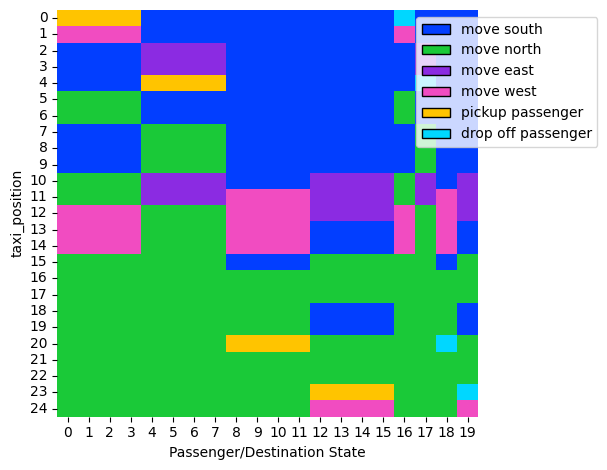

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# pi: reshape to 20,20?
pi_reshaped = np.reshape([pi(i) for i in range(500)], (25, 20))
print(pi_reshaped)
cmap = sns.color_palette("bright", as_cmap=True)

legend_elements = [
        Patch(facecolor=cmap[0], edgecolor="black", label="move south"),
        Patch(facecolor=cmap[2], edgecolor="black", label="move north"),
        Patch(facecolor=cmap[4], edgecolor="black", label="move east"),
        Patch(facecolor=cmap[6], edgecolor="black", label="move west"),
        Patch(facecolor=cmap[8], edgecolor="black", label="pickup passenger"),
        Patch(facecolor=cmap[9], edgecolor="black", label="drop off passenger")
    ]


sns.heatmap(pi_reshaped, cmap=cmap, cbar=False)
plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
plt.ylabel("taxi_position")
plt.xlabel("Passenger/Destination State")
plt.tight_layout()
plt.savefig("vi_taxi_policy.png")

In [291]:
'''
import gymnasium
env = gymnasium.make("Taxi-v3")
V, V_track, pi = Planner(env.P).policy_iteration(gamma=.99)


'''
help(Planner.policy_iteration)

Help on function policy_iteration in module __main__:

policy_iteration(self, gamma=1.0, n_iters=50, theta=1e-10)
    PARAMETERS:
    
    gamma {float}:
        Discount factor
    
    n_iters {int}:
        Number of iterations
    
    theta {float}:
        Convergence criterion for policy evaluation.
        State values are considered to be converged when the maximum difference between new and previous state
        values is less than theta.
    
    
    RETURNS:
    
    V {numpy array}, shape(possible states):
        State values array
    
    V_track {numpy array}, shape(n_episodes, nS):
        Log of V(s) for each iteration
    
    pi {lambda}, input state value, output action value:
        Policy mapping states to actions.



[[4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 5 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 1 1 2 2 2 2 0 0 0 0 2 2 2 2 1 2 0 2]
 [1 1 1 1 2 2 2 2 3 3 3 3 2 2 2 2 1 2 3 2]
 [3 3 3 3 1 1 1 1 3 3 3 3 2 2 2 2 3 1 3 2]
 [3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0]
 [3 3 3 3 1 1 1 1 3 3 3 3 0 0 0 0 3 1 3 0]
 [1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 1 1 1 5 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1

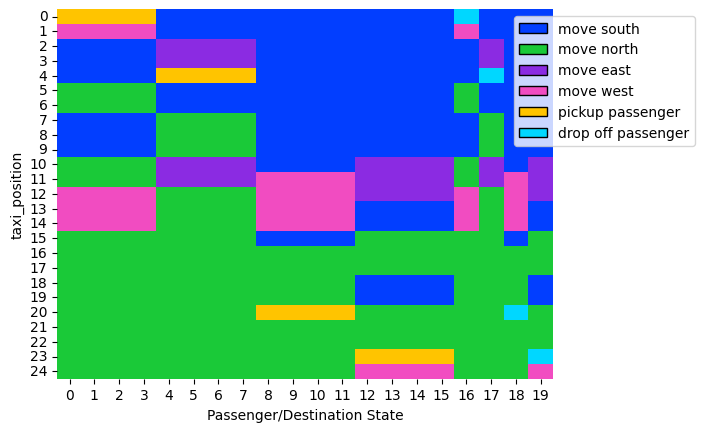

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# pi: reshape to 20,20?
pi_reshaped = np.reshape([pi[i] for i in range(500)], (25, 20))
print(pi_reshaped)
cmap = sns.color_palette("bright", as_cmap=True)

legend_elements = [
        Patch(facecolor=cmap[0], edgecolor="black", label="move south"),
        Patch(facecolor=cmap[2], edgecolor="black", label="move north"),
        Patch(facecolor=cmap[4], edgecolor="black", label="move east"),
        Patch(facecolor=cmap[6], edgecolor="black", label="move west"),
        Patch(facecolor=cmap[8], edgecolor="black", label="pickup passenger"),
        Patch(facecolor=cmap[9], edgecolor="black", label="drop off passenger")
    ]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

sns.heatmap(pi_reshaped, cmap=cmap, cbar=False)
plt.ylabel("taxi_position")
plt.xlabel("Passenger/Destination State")
plt.savefig("pi_taxi_policy.png")


In [ ]:
Q, V, pi, Q_track, pi_track = RL(env.env).q_learning(epsilon_decay_ratio=.99)

runtime = 20.45 seconds


In [ ]:
help (RL(env.env).q_learning)

Help on method q_learning in module algorithms.rl:

q_learning(nS=None, nA=None, convert_state_obs=<function RL.<lambda> at 0x7ec42c44b250>, gamma=0.99, init_alpha=0.5, min_alpha=0.01, alpha_decay_ratio=0.5, init_epsilon=1.0, min_epsilon=0.1, epsilon_decay_ratio=0.9, n_episodes=10000) method of algorithms.rl.RL instance
    Parameters
    ----------------------------
    nS {int}:
        Number of states
    
    nA {int}:
        Number of available actions
        
    convert_state_obs {lambda}:
        The state conversion utilized in BlackJack ToyText problem.
        Returns three state tuple as one of the 280 converted states.
    
    gamma {float}, default = 0.99:
        Discount factor
    
    init_alpha {float}, default = 0.5:
        Learning rate
    
    min_alpha {float}, default = 0.01:
        Minimum learning rate
    
    alpha_decay_ratio {float}, default = 0.5:
        Decay schedule of learing rate for future iterations
    
    init_epsilon {float}, default = 

[[0 4 4 4 2 0 0 2 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 2 0 2 2 0 0 0 0 2 2 0 0 0 2 0 0]
 [0 0 0 0 2 0 2 2 0 0 0 3 0 0 0 0 0 2 0 0]
 [0 0 0 0 4 0 4 4 0 0 0 3 0 0 0 0 0 5 3 0]
 [0 1 1 1 0 0 2 2 0 0 0 0 2 2 0 0 1 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0]
 [0 0 0 0 2 0 2 2 0 0 0 0 2 2 0 0 0 1 0 0]
 [0 0 3 0 2 0 1 2 0 3 0 3 0 0 0 0 0 1 0 0]
 [0 0 3 3 1 0 1 1 0 3 0 0 0 0 3 0 0 1 3 0]
 [0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2]
 [0 1 1 3 2 0 2 2 3 3 0 3 2 2 2 0 1 2 3 2]
 [0 3 3 3 1 0 2 1 3 3 0 3 2 2 2 0 3 1 3 2]
 [0 3 3 3 2 0 1 1 3 3 0 3 0 0 0 0 3 1 3 0]
 [0 3 3 3 1 0 1 1 3 3 0 3 3 0 3 0 3 1 3 0]
 [0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1]
 [0 1 1 1 1 0 1 2 1 1 0 1 2 2 1 0 1 1 1 1]
 [0 1 3 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 0 1 2 1 1 0 1 0 0 0 0 1 1 1 0]
 [0 1 1 3 1 0 1 1 3 3 0 1 0 0 0 0 1 1 3 0]
 [0 1 1 1 1 0 1 1 4 4 0 4 1 1 1 0 1 1 5 1]
 [0 1 1 1 1 0 1 1 1 1 0 1 1 1 2 0 1 1 1 1]
 [0 3 1 1 1 0 1 1 1 1 0 1 1 1 1 0 3 1 1 1]
 [0 1 1 1 1

Text(0.5, 23.52222222222222, 'Passenger/Destination State')

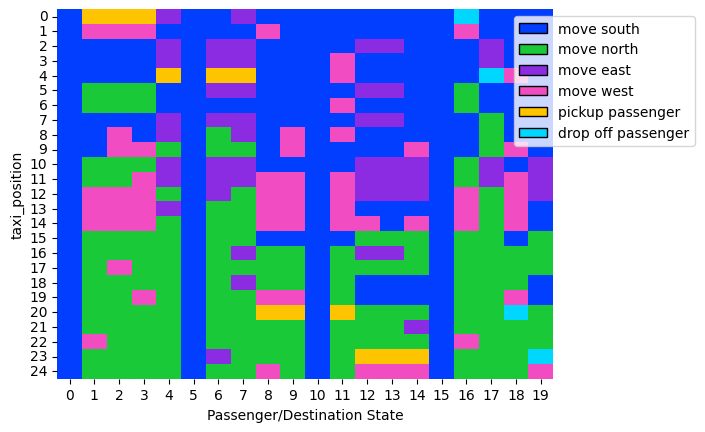

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# pi: reshape to 20,20?
pi_reshaped = np.reshape([pi(i) for i in range(500)], (25, 20))
print(pi_reshaped)
cmap = sns.color_palette("bright", as_cmap=True)

legend_elements = [
        Patch(facecolor=cmap[0], edgecolor="black", label="move south"),
        Patch(facecolor=cmap[2], edgecolor="black", label="move north"),
        Patch(facecolor=cmap[4], edgecolor="black", label="move east"),
        Patch(facecolor=cmap[6], edgecolor="black", label="move west"),
        Patch(facecolor=cmap[8], edgecolor="black", label="pickup passenger"),
        Patch(facecolor=cmap[9], edgecolor="black", label="drop off passenger")
    ]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

sns.heatmap(pi_reshaped, cmap=cmap, cbar=False)
plt.ylabel("taxi_position")
plt.xlabel("Passenger/Destination State")
#plt.savefig("QL_Taxi_Policy.png")

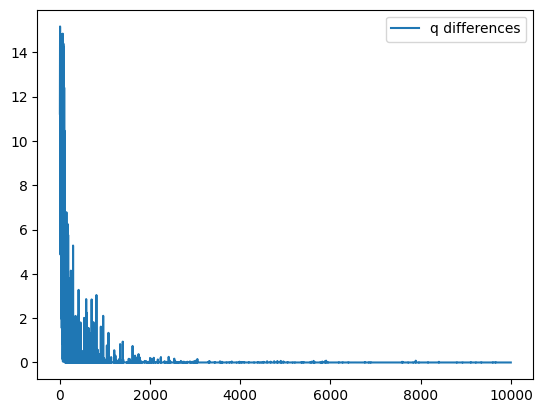

In [ ]:
len(Q_track)
diffs = []

for i, q in enumerate(Q_track[1:]):
  diff = np.max(np.abs(q - Q_track[i]))
  diffs.append(diff)



plt.plot(diffs, label="q differences")
#plt.plot([1810, 1810], [17.5, 0], 'k-', lw=2, color="red", label="convergence")
plt.legend()

In [194]:
#possibilities: similarity scores, test_scores, convergence time for different epsilon values. .8, .9, .99)

def get_differences(Q_track):
  diffs = []

  for i, q in enumerate(Q_track[1:]):
    diff = np.max(np.abs(q - Q_track[i]))
    diffs.append(diff)

  return diffs

def get_similarities(p1, p2):
  return np.mean(p1 == p2)


def get_convergence(diffs):
  avgs = []
  for i in range(0, len(diffs), 10):
   avgs.append(np.mean(diffs[i:i+10]))

  for i, q in enumerate(avgs):
    if q < 1e-5:
      return i * 10

  return 0


In [219]:
import time
_, _, pi_star = Planner(env.P).policy_iteration(gamma=.99)
pi_star = np.array(list(pi_star.values()))
eps_results = []

epsilons = [.8, .9, .99]
seeds = list(range(5))

for eps in epsilons:
  convs = []
  sims = []
  runtimes = []
  for seed in seeds:
    np.random.seed(seed)
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(env.env).q_learning(epsilon_decay_ratio=eps)
    pi = np.array([pi(s) for s in range(500)])
    end = time.time()
    runtime = end - start
    diffs = get_differences(Q_track)
    sim = get_similarities(pi, pi_star)
    conv = get_convergence(diffs)
    convs.append(conv)
    sims.append(sim)
    runtimes.append(runtime)

  eps_results.append({"eps": eps, "sim": np.mean(sims), "conv": np.mean(convs), "runtime": np.mean(runtime)})


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


runtime = 15.54 seconds


runtime = 15.01 seconds


runtime = 15.45 seconds


runtime = 16.02 seconds


runtime = 16.30 seconds


runtime = 16.54 seconds


runtime = 17.84 seconds


runtime = 17.58 seconds


runtime = 17.87 seconds


runtime = 16.45 seconds


runtime = 16.56 seconds


runtime = 20.09 seconds


runtime = 18.69 seconds


runtime = 17.58 seconds


runtime = 17.69 seconds


In [220]:
print(eps_results)

[{'eps': 0.8, 'sim': 0.7428, 'conv': 1696.0, 'runtime': 16.37973690032959}, {'eps': 0.9, 'sim': 0.7420000000000001, 'conv': 1592.0, 'runtime': 16.493028163909912}, {'eps': 0.99, 'sim': 0.7527999999999999, 'conv': 1564.0, 'runtime': 17.736024379730225}]


In [ ]:
# pick .001 for q convergence

test_scores = TestEnv.test_env(env=env.env, render=False, user_input=False, pi=pi)
print(test_scores)

[ 5. 10.  7.  6. 10.  8.  8. 10. 10.  4.]


In [215]:
np.mean([1, 2, 3])
# so: Q-Learning does well on the taxi

2.0

[link text](https://)